<a href="https://colab.research.google.com/github/AleksDec/fertility-rate-1960-2020_PL/blob/main/Women's_fertility_1960_2020_PL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
pd.__version__

'1.3.5'

In [ ]:
# !pip install xlrd --upgrade

In [ ]:
df = pd.read_excel('tablica_7.xls')

<h3><font color=BDE6F1>Tabl. 7. Dzietność kobiet w latach 1960-2020 </br>
Liczby przedstawiają urodzenia żywe na 1000 kobiet w grupach wieku.


*a  - Wiek matek w momencie urodzenia pierwszego dziecka, który połowa matek już przekroczyła, a którego druga połowa jeszcze nie osiągnęła*

<h4><font color=FFE59D>1. Modyfikacja nazw kolumn, wyszukanie wartości Nan

In [ ]:
df.head()

,Lata,15-19,20-24,25-29,30-34,35-39,40-44,45-49,Współ- czynnik dziet- ności,Mediana wieku kobiet rodzących pierwsze dzieckoa,Przeciętny wiek rodzących kobiet,Przeciętny wiek kobiet rodzących pierwsze dziecko
0,1960,45.0,199.0,165.0,103.0,60.0,22.0,2.0,2.98,...,27.5,25
1,1965,32.0,184.0,144.0,84.0,43.0,15.0,2.0,2.52,...,27.4,23.5
2,1970,30.0,165.0,126.0,71.0,36.0,11.0,1.0,2.20,22.5,26.3,22.8
3,1971,29.0,171.0,130.0,72.0,36.0,11.0,1.0,2.25,...,26.2,22.7
4,1972,27.0,168.0,134.0,71.0,35.0,11.0,1.0,2.24,...,26.1,22.9


In [ ]:
df.columns

Index(['Lata', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49',
       'Współ- czynnik dziet- ności',
       'Mediana wieku kobiet rodzących pierwsze dzieckoa        ',
       'Przeciętny wiek rodzących kobiet ',
       'Przeciętny wiek kobiet rodzących pierwsze dziecko '],
      dtype='object')

In [ ]:
df = df.rename(columns={'Współ- czynnik dziet- ności':'Wsp. dzietnosci', 'Mediana wieku kobiet rodzących pierwsze dzieckoa        ':'Mdn wieku - I dziecko', 'Przeciętny wiek rodzących kobiet ':'Przec. wiek rodzacych', 'Przeciętny wiek kobiet rodzących pierwsze dziecko ':'Przec. wiek rodzacych - I dziecko'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Lata                               53 non-null     int64  
 1   15-19                              53 non-null     float64
 2   20-24                              53 non-null     float64
 3   25-29                              53 non-null     float64
 4   30-34                              53 non-null     float64
 5   35-39                              53 non-null     float64
 6   40-44                              53 non-null     float64
 7   45-49                              53 non-null     float64
 8   Wsp. dzietnosci                    53 non-null     float64
 9   Mdn wieku - I dziecko              53 non-null     object 
 10  Przec. wiek rodzacych              53 non-null     float64
 11  Przec. wiek rodzacych - I dziecko  53 non-null     object 
d

In [ ]:
df.isna().any()

Lata                                 False
15-19                                False
20-24                                False
25-29                                False
30-34                                False
35-39                                False
40-44                                False
45-49                                False
Wsp. dzietnosci                      False
Mdn wieku - I dziecko                False
Przec. wiek rodzacych                False
Przec. wiek rodzacych - I dziecko    False
dtype: bool

<h4><font color=FFE59D>1.1. Znalezienie wierszy i kolumn zawierających '...'

In [ ]:
df.where(df=='...').any()

Lata                                 False
15-19                                False
20-24                                False
25-29                                False
30-34                                False
35-39                                False
40-44                                False
45-49                                False
Wsp. dzietnosci                      False
Mdn wieku - I dziecko                 True
Przec. wiek rodzacych                False
Przec. wiek rodzacych - I dziecko     True
dtype: bool

<h5><font color=FFE59D>1.2. Wartości '...' znajdują się w kolumnach -> 'Mdn wieku - I dziecko'  oraz   'Przec. wiek rodzacych - I dziecko'
</br>

<h5><font color=EEB0B0>1.3. 'Przec. wiek rodzacych - I dziecko' - wypełnienie wierszy zawierających '...' średnią z wartości z roku poprzedniego i następnego
</br>

In [ ]:
df[df['Przec. wiek rodzacych - I dziecko']=='...'].dropna()

,Lata,15-19,20-24,25-29,30-34,35-39,40-44,45-49,Wsp. dzietnosci,Mdn wieku - I dziecko,Przec. wiek rodzacych,Przec. wiek rodzacych - I dziecko
50,2018,10.3,48.9,98.1,84.8,37.9,7.7,0.4,1.435,...,30.2,...


In [ ]:
df.loc[49:51]

,Lata,15-19,20-24,25-29,30-34,35-39,40-44,45-49,Wsp. dzietnosci,Mdn wieku - I dziecko,Przec. wiek rodzacych,Przec. wiek rodzacych - I dziecko
49,2017,10.9,50.6,99.1,86.1,37.2,7.5,0.3,1.453,27.8,30.1,27.9
50,2018,10.3,48.9,98.1,84.8,37.9,7.7,0.4,1.435,...,30.2,...
51,2019,9.4,47.1,97.1,84.6,38.3,7.9,0.4,1.419,28.2,30.4,28.3


In [ ]:
df['Przec. wiek rodzacych - I dziecko'][50] = df.loc[49:51:2]['Przec. wiek rodzacych - I dziecko'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.loc[49:51]

,Lata,15-19,20-24,25-29,30-34,35-39,40-44,45-49,Wsp. dzietnosci,Mdn wieku - I dziecko,Przec. wiek rodzacych,Przec. wiek rodzacych - I dziecko
49,2017,10.9,50.6,99.1,86.1,37.2,7.5,0.3,1.453,27.8,30.1,27.9
50,2018,10.3,48.9,98.1,84.8,37.9,7.7,0.4,1.435,...,30.2,28.1
51,2019,9.4,47.1,97.1,84.6,38.3,7.9,0.4,1.419,28.2,30.4,28.3


<h5><font color=EEB0B0>1.4. Wypełnienie wierszy zawierających '...' wartościami liczonymi w stosunku do kolumny -> Przec. wiek rodzacych - I dziecko

In [ ]:
df_test = df.where(df!='...').dropna()
df_test.isna().any().sum()
df_test.head()

,Lata,15-19,20-24,25-29,30-34,35-39,40-44,45-49,Wsp. dzietnosci,Mdn wieku - I dziecko,Przec. wiek rodzacych,Przec. wiek rodzacych - I dziecko
2,1970,30.0,165.0,126.0,71.0,36.0,11.0,1.0,2.200,22.5,26.3,22.8
7,1975,31.4,170.1,136.5,71.4,33.9,10.0,0.7,2.270,22.7,25.8,23
12,1980,32.9,179.6,136.4,69.1,29.0,7.5,0.6,2.276,23,26.0,23.4
16,1984,35.7,185.5,142.8,71.8,31.0,7.0,0.5,2.372,23.2,26.6,23.7
17,1985,35.1,182.6,140.7,69.9,30.2,6.9,0.5,2.329,23.3,26.7,23.8


In [ ]:
diff = df_test['Przec. wiek rodzacych - I dziecko'].mean() - df_test['Mdn wieku - I dziecko'].mean()
diff

0.3364614141300031

In [ ]:
rows  = df.loc[df['Mdn wieku - I dziecko']=='...'].index

In [ ]:
df.iloc[rows,9] = df.iloc[rows,11] - diff

In [ ]:
#df[df['Mdn wieku - I dziecko']=='...']['Mdn wieku - I dziecko'] = df.loc[df['Mdn wieku - I dziecko']=='...']['Mdn wieku - I dziecko'].apply(lambda x : 1)

In [ ]:
df.head()

,Lata,15-19,20-24,25-29,30-34,35-39,40-44,45-49,Wsp. dzietnosci,Mdn wieku - I dziecko,Przec. wiek rodzacych,Przec. wiek rodzacych - I dziecko
0,1960,45.0,199.0,165.0,103.0,60.0,22.0,2.0,2.98,24.663539,27.5,25
1,1965,32.0,184.0,144.0,84.0,43.0,15.0,2.0,2.52,23.163539,27.4,23.5
2,1970,30.0,165.0,126.0,71.0,36.0,11.0,1.0,2.20,22.5,26.3,22.8
3,1971,29.0,171.0,130.0,72.0,36.0,11.0,1.0,2.25,22.363539,26.2,22.7
4,1972,27.0,168.0,134.0,71.0,35.0,11.0,1.0,2.24,22.563539,26.1,22.9


In [ ]:
df['Mdn wieku - I dziecko'] = df['Mdn wieku - I dziecko'].apply(lambda x : round(x,1))

In [ ]:
df.head()

,Lata,15-19,20-24,25-29,30-34,35-39,40-44,45-49,Wsp. dzietnosci,Mdn wieku - I dziecko,Przec. wiek rodzacych,Przec. wiek rodzacych - I dziecko
0,1960,45.0,199.0,165.0,103.0,60.0,22.0,2.0,2.98,24.7,27.5,25
1,1965,32.0,184.0,144.0,84.0,43.0,15.0,2.0,2.52,23.2,27.4,23.5
2,1970,30.0,165.0,126.0,71.0,36.0,11.0,1.0,2.20,22.5,26.3,22.8
3,1971,29.0,171.0,130.0,72.0,36.0,11.0,1.0,2.25,22.4,26.2,22.7
4,1972,27.0,168.0,134.0,71.0,35.0,11.0,1.0,2.24,22.6,26.1,22.9


<h3><font color=BDE6F1>2. Analiza danych na wykresach

<h5><font color=BDE6F1>2.1. Przegląd współczynników ogółem

In [ ]:
df.columns

Index(['Lata', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49',
       'Wsp. dzietnosci', 'Mdn wieku - I dziecko', 'Przec. wiek rodzacych',
       'Przec. wiek rodzacych - I dziecko'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

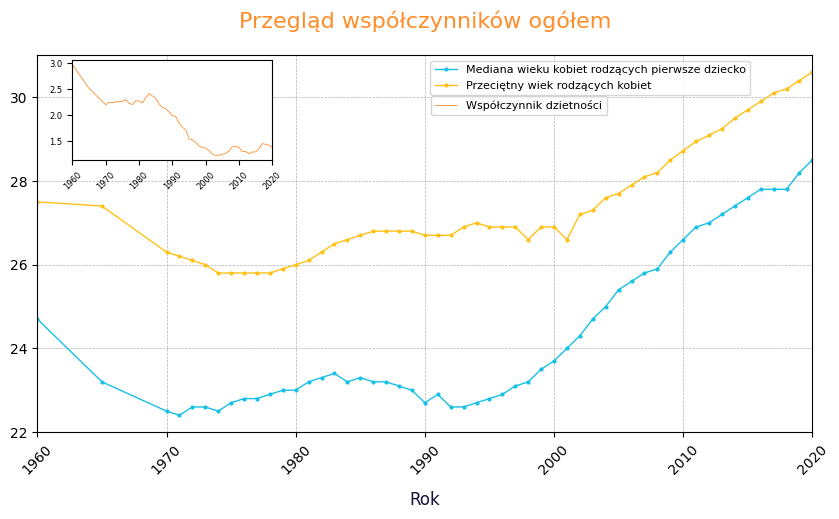

In [ ]:
fig, ax1 = plt.subplots(figsize=(10,5), dpi=100)
plt.xlim(df['Lata'].min(),df['Lata'].max())
plt.xlabel('Rok', fontsize=12, color='#15133C', labelpad=10)
plt.title('Przegląd współczynników ogółem', fontdict={'fontsize': 16, 'fontweight' : 4, 'color' : '#FF8D29'}, pad=20)

#ax1
ax1.grid(axis='both', linestyle='--', linewidth=0.5)

ax1.plot(df['Lata'],df['Mdn wieku - I dziecko'], linewidth=1, color='#17c0e6', marker='o', markersize=2, label='Mediana wieku kobiet rodzących pierwsze dziecko')
ax1.plot(df['Lata'],df['Przec. wiek rodzacych'], linewidth=1, color='#ffc117', marker='o', markersize=2, label='Przeciętny wiek rodzących kobiet')
ax1.tick_params(axis='x', labelsize=10, rotation=45)
ax1.tick_params(axis='y', labelsize=10)

ax1.legend(loc='best', bbox_to_anchor=(0.5, 0.6, 0.5, 0.4), fontsize=8)

#ax2
ax2 = fig.add_axes([0.16,0.67,0.2,0.2])
ax2.plot(df['Lata'],df['Wsp. dzietnosci'], linewidth=0.6, color='#FF8D29', label='Współczynnik dzietności')
plt.xlim(df['Lata'].min(),df['Lata'].max())
ax2.tick_params(axis='x', labelsize=6, rotation=45)
ax2.tick_params(axis='y', labelsize=6)

ax2.legend(loc='best', bbox_to_anchor=(2.2, 0.3, 0.5, 0.4), fontsize=8)

plt.show()

<h5><font color=BDE6F1>2.2. Porównanie współczynnika dzietności dla miast i wsi

In [ ]:
df_m = pd.read_excel('tablica_7.xls', sheet_name=1)
df_w = pd.read_excel('tablica_7.xls', sheet_name=2)

In [ ]:
df_m.columns
df_w.columns

Index(['Lata', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49',
       'Wsp. dzietnosci'],
      dtype='object')

In [ ]:
df_m = df_m.rename(columns={'Współ- czynnik dziet- ności':'Wsp. dzietnosci'})
df_w = df_w.rename(columns={'Współ- czynnik dziet- ności':'Wsp. dzietnosci'})

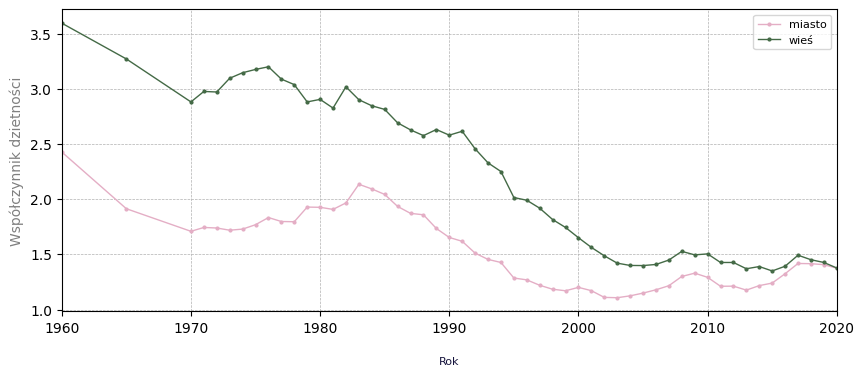

In [ ]:
fig, ax1 = plt.subplots(figsize=(10,4), dpi=100)
plt.xlim(df_m['Lata'].min(),df_m['Lata'].max())
plt.xlabel('Rok', fontsize=8, color='#15133C', labelpad=15)

ax1.plot(df_m['Lata'],df_m['Wsp. dzietnosci'], linewidth=1, color='#E4AEC5', marker='o', markersize=2, label='miasto')
ax1.grid(axis='both', linestyle='--', linewidth=0.5)
ax1.set_ylabel('Współczynnik dzietności', size=10, color='gray')

ax1.plot(df_w['Lata'],df_w['Wsp. dzietnosci'], linewidth=1, color='#446A46', marker='o', markersize=2, label='wieś')

ax1.legend(loc='best', bbox_to_anchor=(0.5, 0.6, 0.5, 0.4), fontsize=8)


plt.show()

<h5><font color=BDE6F1>2.3. Porównanie grup wiekowych dla różnych przedziałów czasu


In [ ]:
import plotly.express as px

In [ ]:
df_60_80 = df.loc[(df['Lata']>1960) & (df['Lata']<1980)]
df_80_00 = df.loc[(df['Lata']>1980) & (df['Lata']<2000)]
df_00_20 = df.loc[(df['Lata']>2000) & (df['Lata']<2020)]
df_20 = df.loc[(df['Lata']==2000)]

In [ ]:
df_60_80[['15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49']].mean() # Example

15-19     31.063636
20-24    171.354545
25-29    134.518182
30-34     72.118182
35-39     34.054545
40-44     10.263636
45-49      0.945455
dtype: float64

In [ ]:
fig = px.pie( names = df_60_80[['15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49']].mean().index,
             values = df_60_80[['15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49']].mean().values,
             title = 'Urodzenia żywe na 1000 kobiet w grupach wieku (1960-1979)', 
             hover_name = df_60_80[['15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49']].mean().index,
             hole = 0.4,
             width = 600, 
             height = 400, 
             color_discrete_sequence =('#c2f542','#f5b642', '#f56c42', '#a88980', '#344501') )

fig.update_traces(textposition='inside', textfont_size=12, textinfo='percent')

fig.show()

In [ ]:
fig = px.pie( names = df_80_00[['15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49']].mean().index,
             values = df_80_00[['15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49']].mean().values,
             title = 'Urodzenia żywe na 1000 kobiet w grupach wieku (1980-1999)', 
             hover_name = df_60_80[['15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49']].mean().index,
             hole = 0.4,
             width = 600, 
             height = 400, 
             color_discrete_sequence =('#c2f542','#f5b642', '#f56c42', '#a88980', '#344501') )

fig.update_traces(textposition='inside', textfont_size=12, textinfo='percent')
fig.update_layout(legend=dict({'traceorder': 'normal'}) )

fig.show()

In [ ]:
fig = px.pie( names = df_00_20[['15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49']].mean().index,
             values = df_00_20[['15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49']].mean().values,
             title = 'Urodzenia żywe na 1000 kobiet w grupach wieku (2000-2019)', 
             hover_name = df_60_80[['15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49']].mean().index,
             hole = 0.4,
             width = 600, 
             height = 400, 
             color_discrete_sequence =('#c2f542','#f5b642', '#f56c42', '#a88980', '#344501') )

fig.update_traces(textposition='inside', textfont_size=12, textinfo='percent')

fig.show()

In [ ]:
fig = px.pie( names = df_20[['15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49']].mean().index,
             values = df_20[['15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49']].mean().values,
             title = 'Urodzenia żywe na 1000 kobiet w grupach wieku (2020)', 
             hover_name = df_60_80[['15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49']].mean().index,
             hole = 0.4,
             width = 600, 
             height = 400, 
             color_discrete_sequence =('#c2f542','#f5b642', '#f56c42', '#a88980', '#344501') )

fig.update_traces(textposition='inside', textfont_size=12, textinfo='percent')

fig.show()